Uploading the Suicide_Detection dataset

In [1]:
from google.colab import files
upload = files.upload()

Saving Suicide_Detection.csv to Suicide_Detection.csv


Importing the required packages for pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
import warnings

In [3]:
df = pd.read_csv('Suicide_Detection.csv')

Data Exploration of the given dataset

In [ ]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
df.describe()

,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [7]:
df.size

696222

In [8]:
df.shape

(232074, 3)

In [9]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

The above query shows that there is no null values in the dataset

In [11]:
df = df.drop('Unnamed: 0',axis=1)
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Using preprocessing methods like Lemmatization and also to remove stop words

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [14]:
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']
warnings.filterwarnings('ignore')

In [15]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)

    for r in regexes_to_remove:
        df['text'][i] = re.sub(r, '', review)

Calculating the length of the posts for visualization

In [27]:
for i in range(0, 1000):
  df['len'] = df['text'].str.len()

In [28]:
df

,text,class,len
0,ex wife threatening suiciderecently left wife ...,suicide,396
1,weird get affected compliment coming someone k...,non-suicide,88
2,finally almost never hear bad year ever swear ...,non-suicide,66
3,need helpjust help im cry hard,suicide,30
4,losthello name adam struggling year afraid pas...,suicide,1433
...,...,...,...
232069,like rock going get anything go http musictast...,non-suicide,89
232070,tell many friend lonely everything deprived pr...,non-suicide,91
232071,pee probably taste like salty tea someone dran...,non-suicide,59
232072,usual stuff find herei posting sympathy pity k...,suicide,881


The graph below shows that the data is evenly split between suicide & depression classes.

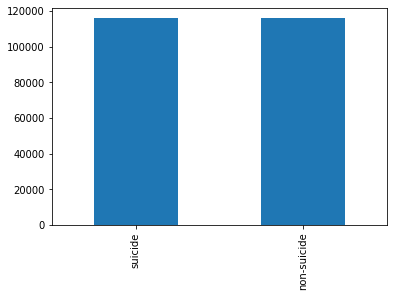

In [10]:
df['class'].value_counts().plot(kind = 'bar')

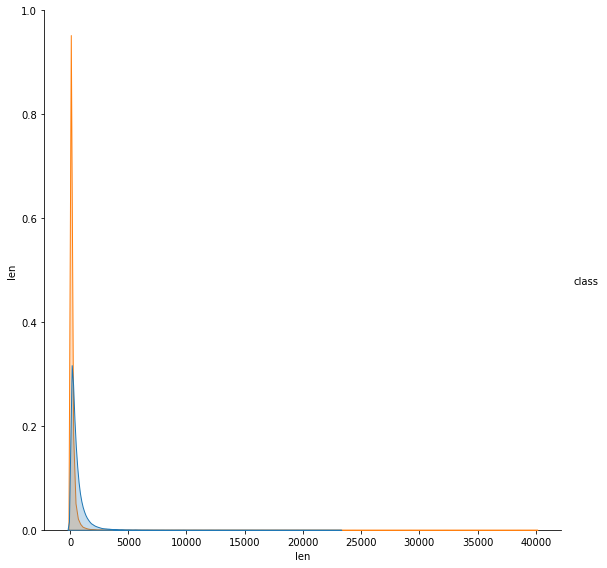

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="class", size = 8)

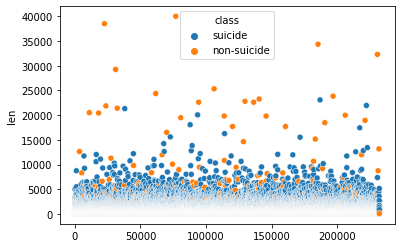

In [42]:
sns.scatterplot(x=df.index, y=df['len'], hue=df['class'])

Top 10 words used in the posts from the dataset

     Word  Frequency
0    like     185173
1    want     159070
2    know     138134
3    feel     136799
4    life     129469
5     get     120757
6    time     105794
7  people      95877
8     one      95173
9  friend      92715


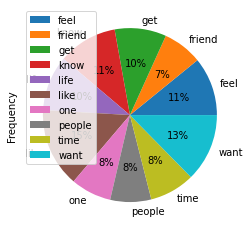

In [63]:
from collections import Counter
p = Counter(" ".join(df['text']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

col = rslt['Word'].tolist()

rslt.groupby(['Word']).sum().plot(
    kind='pie', y='Frequency', autopct='%1.0f%%')
